In [8]:
import fastplotlib as fpl
import os
import sys
import masknmf
import tifffile
import torch
import numpy as np

import matplotlib.pyplot as plt
import time
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
pmd_obj = np.load("/home/flynn/Documents/pmd_reg_subfov.npz", allow_pickle=True)['arr_0'].item()
pmd_obj

In [6]:
num_frames, fov_dim1, fov_dim2 = pmd_obj.shape
device = 'cpu'
pmd_demixer = masknmf.demixing.signal_demixer.SignalDemixer(
                                                pmd_obj,
                                                device=device,
                                                frame_batch_size=100)

AttributeError: 'PMDArray' object has no attribute '_r'

In [ ]:
init_kwargs = {
    #Worth modifying
    'mad_correlation_threshold':0.8,

    #Mostly stable
    'min_superpixel_size':5,
    'robust_corr_term':0,
    'mad_threshold':3,
    'residual_threshold': 0.3,
    'patch_size':(40, 40),
    'plot_en':True,
    'text':False,
}

pmd_demixer.initialize_signals(**init_kwargs, is_custom = False)
print(f"Identified {pmd_demixer.results[0].shape[1]} neurons here")

In [5]:
pmd_demixer.lock_results_and_continue()

Now in demixing state


(5632, 248, 248)

In [9]:
## Demixing State

num_iters = 25
## Now run demixing...
localnmf_params = {
    'maxiter':num_iters,
    'support_threshold':np.linspace(0.95, 0.8, num_iters).tolist(),
    'deletion_threshold':0.2,
    'ring_model_start_pt': 10,
    'ring_radius':10,
    'merge_threshold':0.8,
    'merge_overlap_threshold':0.8,
    'update_frequency':4,
    'c_nonneg':True,
    'denoise':False,
    'plot_en': True
}

start_time = time.time()
with torch.no_grad():
    pmd_demixer.demix(**localnmf_params)
print(f"that took {time.time() - start_time}")
print(f"after this step {pmd_demixer.results.a.shape[1]} signals identified")



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:23<00:00,  1.08it/s]

that took 23.459232091903687
after this step 246 signals identified


RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
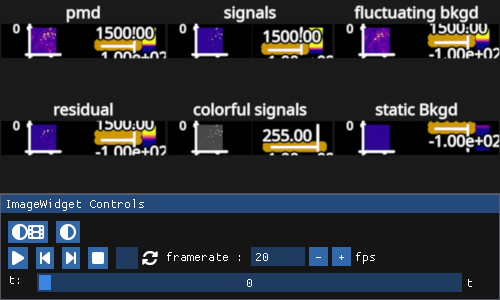

In [10]:
# If desired, you can view the demixing results at this stage 
iw = masknmf.visualization.make_demixing_video(pmd_demixer.results,
                    device,
                    show_histogram = True,
                    v_range = [-100, 1500])

iw.show()

In [11]:
# Move to next stage demixing
pmd_demixer.lock_results_and_continue(carry_background=True)

Now in the initialization state


Computing correlation data structure with MAD threshold  0and the robust corr term is 1
find superpixels!
find pure superpixels!
prepare iteration!


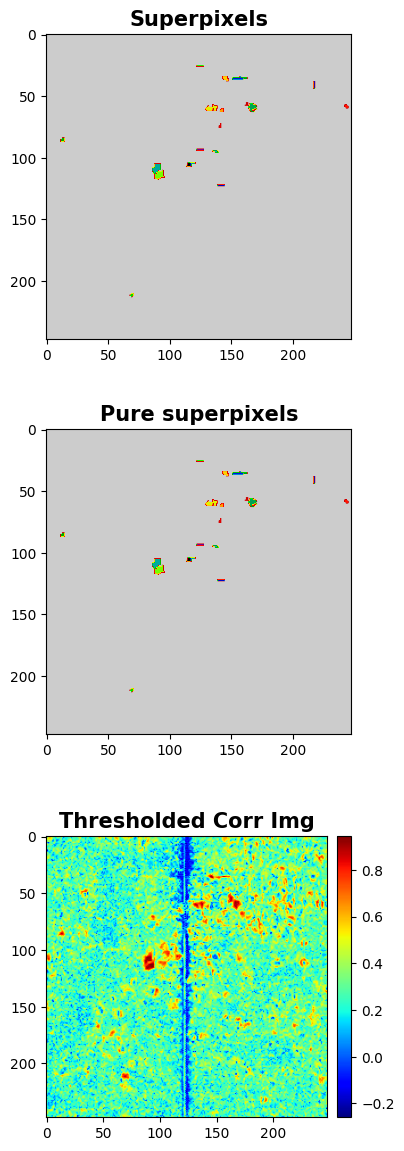

Identified 265 neurons here


In [12]:
init_kwargs = {
    #Worth modifying
    'mad_correlation_threshold':0.9,
    'min_superpixel_size':5,
    'robust_corr_term':1,

    #Mostly stable
    'mad_threshold':0,
    'residual_threshold': 0.3,
    'patch_size':(40, 40),
    'plot_en':True,
    'text':False,
}

pmd_demixer.initialize_signals(**init_kwargs, is_custom = False)
print(f"Identified {pmd_demixer.results[0].shape[1]} neurons here")

In [13]:
# Move to next stage demixing
pmd_demixer.lock_results_and_continue(carry_background=True)

Now in demixing state


In [14]:
## Demixing State
num_iters = 25
## Now run demixing...
localnmf_params = {
    'maxiter':num_iters,
    'support_threshold':np.linspace(0.9, 0.8, num_iters).tolist(),
    'deletion_threshold':0.2,
    'ring_model_start_pt': 4,
    'ring_radius':10,
    'merge_threshold':0.8,
    'merge_overlap_threshold':0.8,
    'update_frequency':4,
    'c_nonneg':True,
    'denoise':False,
    'plot_en': True
}

start_time = time.time()
with torch.no_grad():
    pmd_demixer.demix(**localnmf_params)
print(f"that took {time.time() - start_time}")
print(f"after this step {pmd_demixer.results.a.shape[1]} signals identified")



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:31<00:00,  1.28s/it]

that took 32.36678123474121
after this step 265 signals identified


RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
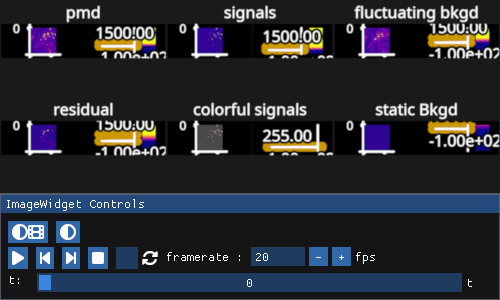

Error during handling pointer_up event
Traceback (most recent call last):
  File "/data/home/app2139/masknmf-toolbox/masknmfvenv/lib/python3.11/site-packages/rendercanvas/_coreutils.py", line 41, in log_exception
    yield
  File "/data/home/app2139/masknmf-toolbox/masknmfvenv/lib/python3.11/site-packages/rendercanvas/_events.py", line 222, in emit
    callback(event)
  File "/data/home/app2139/masknmf-toolbox/masknmfvenv/lib/python3.11/site-packages/wgpu/utils/imgui/imgui_renderer.py", line 183, in _on_mouse
    self._backend.io.add_mouse_button_event(event["button"] - 1, down)
RuntimeError: IM_ASSERT( mouse_button >= 0 && mouse_button < ImGuiMouseButton_COUNT )   ---   imgui.cpp:1698
Error during handling pointer_up event: IM_ASSERT( mouse_button >= 0 … (2)
Error during handling pointer_up event: IM_ASSERT( mouse_button >= 0 … (3)
Error during handling pointer_up event: IM_ASSERT( mouse_button >= 0 … (4)
Error during handling pointer_up event: IM_ASSERT( mouse_button >= 0 … (5)
Error

In [15]:
# If desired, you can view the demixing results at this stage 
iw = masknmf.visualization.make_demixing_video(pmd_demixer.results,
                    device,
                    show_histogram = True,
                    v_range = [-100, 1500])

iw.show()

In [47]:
pmd_demixer.lock_results_and_continue(carry_background=True)

Now in the initialization state


Computing correlation data structure with MAD threshold  1and the robust corr term is 0
find superpixels!
find pure superpixels!
prepare iteration!


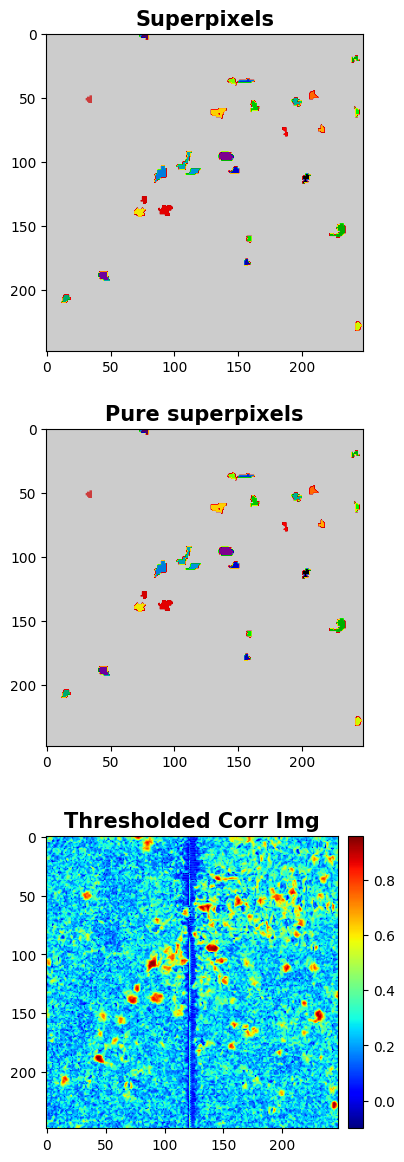

Identified 127 neurons here


In [48]:
init_kwargs = {
    #Worth modifying
    'mad_correlation_threshold':0.8,
    'min_superpixel_size':15,
    'robust_corr_term':0,

    #Mostly stable
    'mad_threshold':1,
    'residual_threshold': 0.3,
    'patch_size':(40, 40),
    'plot_en':True,
    'text':False,
}

pmd_demixer.initialize_signals(**init_kwargs, is_custom = False)
print(f"Identified {pmd_demixer.results[0].shape[1]} neurons here")

In [49]:
pmd_demixer.lock_results_and_continue(carry_background=False)

Now in demixing state


 16%|████████████████████████████████▎                                                                                                                                                                         | 4/25 [00:00<00:00, 23.05it/s]

zero a!
DISPLAYING SOME OF THE COMPONENTS


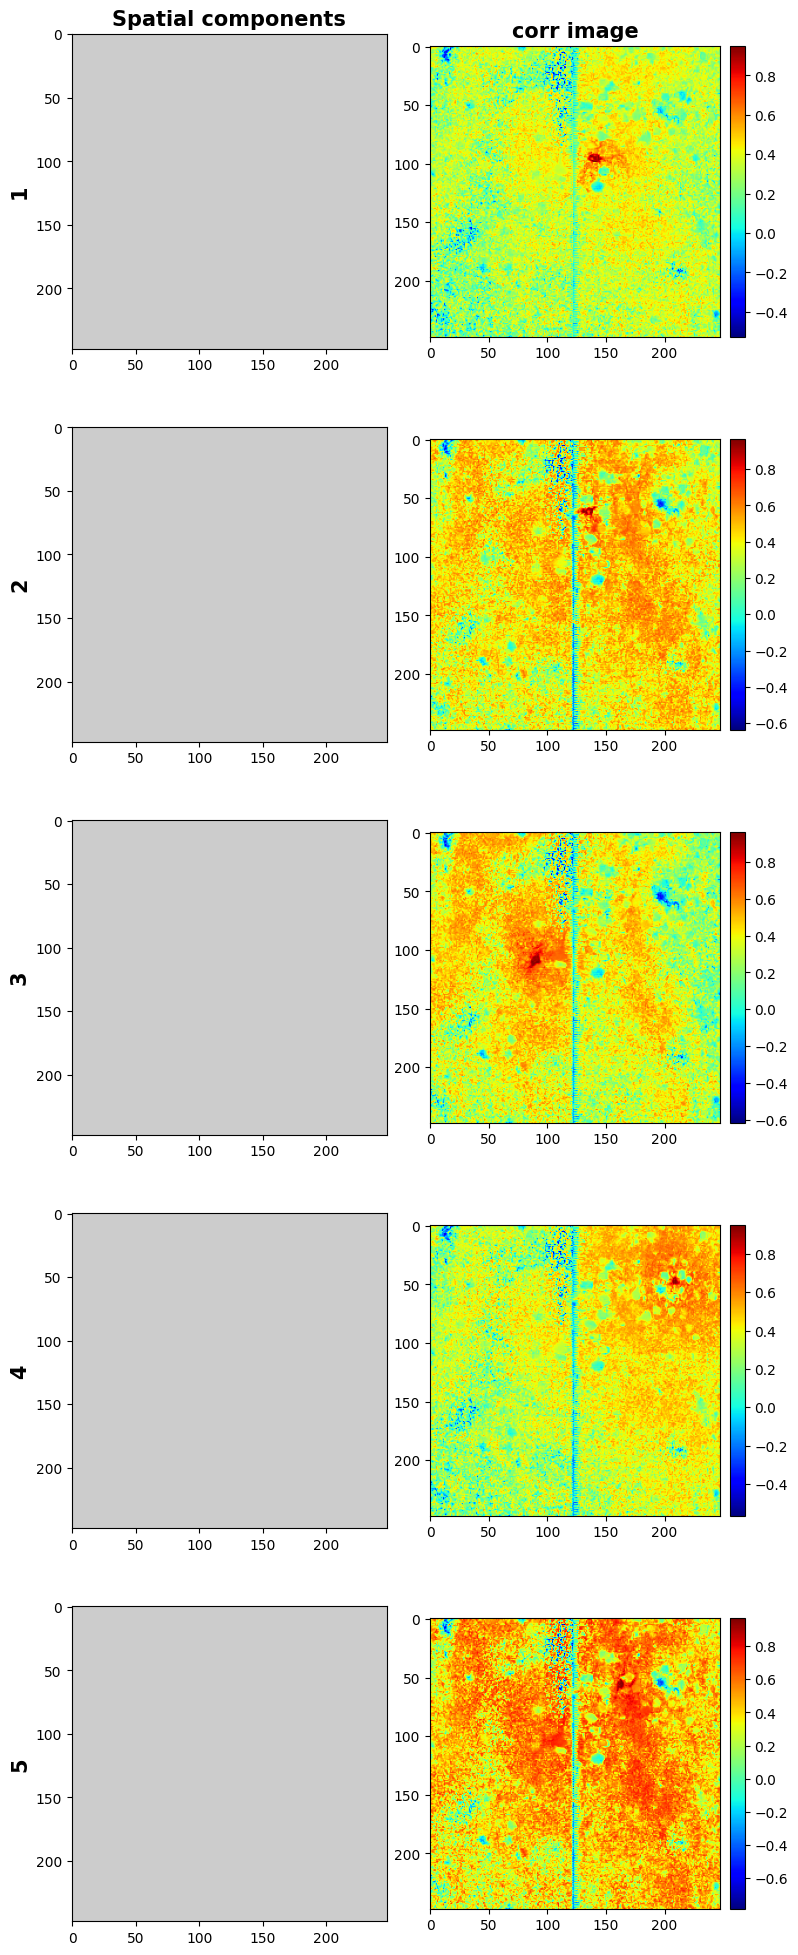

 28%|████████████████████████████████████████████████████████▌                                                                                                                                                 | 7/25 [00:02<00:06,  2.79it/s]

new shape of a is torch.Size([61504, 100])


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:24<00:00,  1.03it/s]

that took 24.5243501663208
after this step 100 signals identified


In [50]:
## Demixing State
num_iters = 25
## Now run demixing...
localnmf_params = {
    'maxiter':num_iters,
    'support_threshold':np.linspace(0.8, 0.6, num_iters).tolist(),
    'deletion_threshold':0.2,
    'ring_model_start_pt': 10,
    'ring_radius':10,
    'merge_threshold':0.8,
    'merge_overlap_threshold':0.8,
    'update_frequency':4,
    'c_nonneg':True,
    'denoise':False,
    'plot_en': True
}

start_time = time.time()
with torch.no_grad():
    pmd_demixer.demix(**localnmf_params)
print(f"that took {time.time() - start_time}")
print(f"after this step {pmd_demixer.results.a.shape[1]} signals identified")



In [81]:
a = pmd_demixer.results.ac_array.export_a()
c = pmd_demixer.results.ac_array.export_c()

#"a" is a fov dim1 x fov dim2 x number of neurons numpy.ndarray
#"c" is a num_frames x num_neurons np.ndarray

In [16]:
## Specify which folder things get saved to: 
folder = 'may2_lbm_t1'
if os.path.exists(folder):
    raise ValueError(f"folder {folder} already exists. delete it or pick different folder name")
else:
    os.mkdir(folder)

results = pmd_demixer.results

for i in range(results.a.shape[1]):
    name = f"neuron_{i}.html"
    masknmf.visualization.plot_ith_roi(i, results, folder=folder, name=name, radius = 30, residual_mode = masknmf.ResidCorrMode.RESIDUAL)

masknmf.visualization.construct_index(folder)

Index file "may2_lbm_t1/index.html" created successfully.
